# Python for data science

# Data Visualization

**Data preparation and preprocessing**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the data
URL='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
df_can=pd.read_excel(URL,skiprows=range(0,20),skipfooter=2,sheet_name='Canada by Citizenship')
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
#print shape
df_can.shape

(195, 43)

In [4]:
#rename columns to names that makes more sense
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# for the sake of consistencies, lets make all column labels string type
df_can.columns=list(map(str,df_can.columns))
df_can.columns

Index(['Type', 'Coverage', 'Country', 'AREA', 'Continent', 'REG', 'Region',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [6]:
#lets set country as index
df_can.set_index('Country',inplace=True)
df_can.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
# create a new column showing the total number of immigration from each country during 1980-2913
df_can['Total']=df_can.sum(axis=1)
df_can.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [8]:
# lets remove some trivial columns that is not important for the analysis
df_can.drop(['Type','Coverage','AREA','REG','DEV'],axis=1,inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,2749


In [9]:
# for the sake of convinience,define a list consisting of year names
columns_list=list(df_can.columns)
year=columns_list[3:-1]
year

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

**Data visualization- line plots**

In [10]:
# In this section we will plot the trends of immigration from different countries into the canada over the year.
# We will utilize some conditional statements and data selection strategies to generate relevant data and plot them

In [11]:
# lets look at immigration trends from haiti. We will first get a series data that contains population trends from haiti from the df_can data frame.


Text(0, 0.5, 'No. of people')

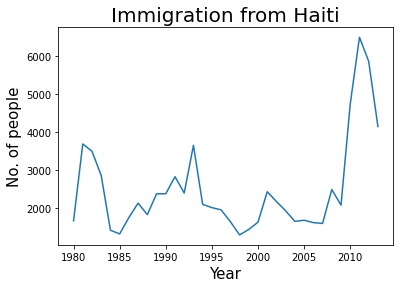

In [12]:
haiti=df_can.loc['Haiti',year]
haiti.plot(kind='line')
plt.title('Immigration from Haiti',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('No. of people',fontsize=15)

Text(0, 0.5, 'No of people')

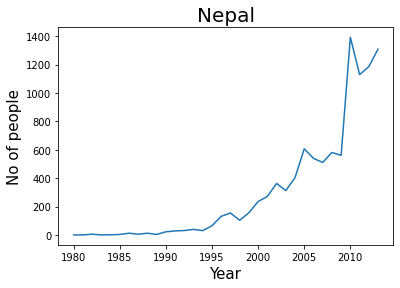

In [13]:
# lets look at the migration from Nepal
nepal=df_can.loc['Nepal',year]
nepal.plot(kind='line')
plt.title('Nepal',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('No of people',fontsize=15)
#add text
#plt.text(1995,1000,'Maoist civil war')
#plt.show()

In [14]:
df_CI=df_can.loc[['India','China'],year]
df_CI=df_CI.transpose()

Text(0, 0.5, 'No of people')

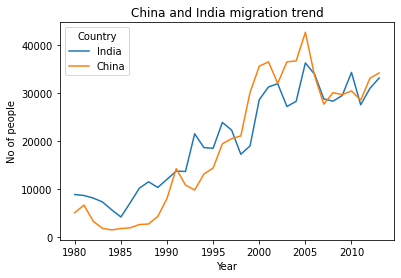

In [15]:
df_CI.plot(kind='line')
plt.title('China and India migration trend')
plt.xlabel('Year')
plt.ylabel('No of people')

In [16]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [17]:
# Groupby
df_continent=df_can.groupby('Continent').sum()
#df_continent.transpose()

In [18]:
df_continent.drop('Total',axis=1)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [19]:
df_continent=df_continent.transpose()
df_continent

Continent,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
1980,3951,31025,39760,13081,9378,1942
1981,4363,34314,44802,15215,10030,1839
1982,3819,30214,42720,16769,9074,1675
1983,2671,24696,24638,15427,7100,1018
1984,2639,27274,22287,13678,6661,878
1985,2650,23850,20844,15171,6543,920
1986,3782,28739,24370,21179,7074,904
1987,7494,43203,46698,28471,7705,1200
1988,7552,47454,54726,21924,6469,1181
1989,9894,60256,60893,25060,6790,1539


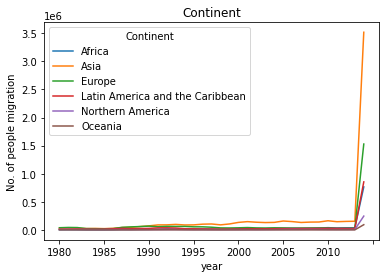

In [20]:
# plot line profile
df_continent.plot(kind='line')
plt.title('Continent')
plt.xlabel('year')
plt.ylabel('No. of people migration')
plt.show()

**Piechart**

In [21]:
df_continent_tot=df_can.groupby('Continent').sum()
df_continent_tot

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,93736


Text(0.5, 1.0, 'Total migration per continent')

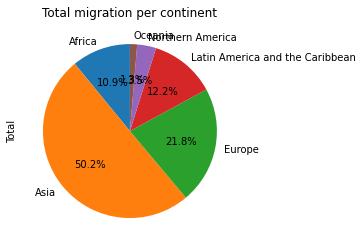

In [22]:
df_continent_tot['Total'].plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Total migration per continent')

**Box plots**

In [23]:
# get immigration data from india and china
df_CI.transpose()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Text(0, 0.5, 'Years')

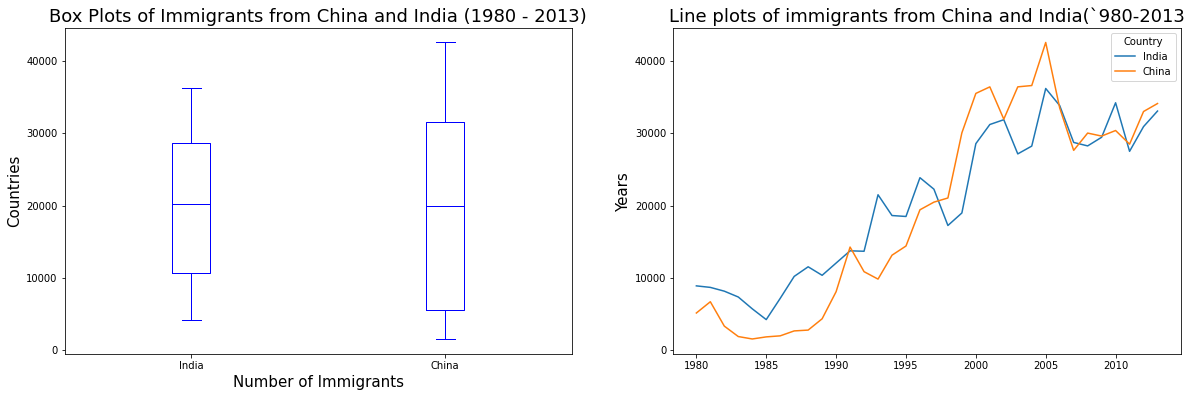

In [24]:
fig=plt.figure()#create figure
ax0=fig.add_subplot(1,2,1)# add subplot 1 ( 1 row,2 columns,first subplot)
ax1=fig.add_subplot(1,2,2) # add subplot 2 ( 1 row, 2 columns,second subplot)
#subplot 1
df_CI.plot(kind='box', color='blue', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)',fontsize=18)
ax0.set_xlabel('Number of Immigrants',fontsize=15)
ax0.set_ylabel('Countries',fontsize=15)
#subplot 2
df_CI.plot(kind='line',figsize=(20,6),ax=ax1)#add to subplot
ax1.set_title('Line plots of immigrants from China and India(`980-2013',fontsize=18)
ax1.set_ylabel('Number of immigrants',fontsize=15)
ax1.set_ylabel('Years',fontsize=15)

In [25]:
df_top15=df_can.sort_values(['Total'],ascending=False).head(15)
### type your answer here
df_total_80s=df_top15.loc[:,year[0:10]].sum(axis=1) # create a data series for each decade.
df_total_90s=df_top15.loc[:,year[10:20]].sum(axis=1)
df_total_00s=df_top15.loc[:,year[20:30]].sum(axis=1)
# create a new df
df_new=pd.DataFrame({'1980s':df_total_80s,'1990s':df_total_90s, '2000s':df_total_00s})
df_new

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

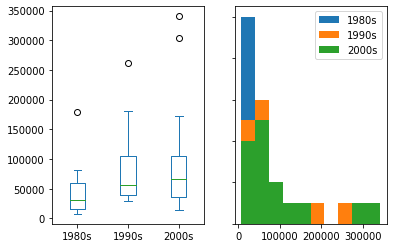

In [26]:
fig=plt.figure()#create figure
ax0=fig.add_subplot(1,2,1)# add subplot 1 ( 1 row,2 columns,first subplot)
ax1=fig.add_subplot(1,2,2) # add subplot 2 ( 1 row, 2 columns,second subplot)
df_new.plot(kind='box', ax=ax0,sharey=True)
df_new.plot(kind='hist',ax=ax1)
plt.tight_layout

**Scatterplots**

In [27]:
#Scatter Plots need numerical datain both x and y axis.
#In first excercise we will plot total immigrants migrated in a given year and find out the trend of change in immigration'
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,99903
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,5744


In [28]:
df_tot=pd.DataFrame(df_can[year].sum(axis=0))# create a dataframe containing totoal immigrated people per year

In [29]:
type(df_tot.index[0])# type of index is string. we need to convert it to    useful 

str

In [30]:
map(int,df_tot.index)

In [31]:
df_tot.index[0]

'1980'

**Scatterplot**

In [32]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2774
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,2749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,99903
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2719
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,5744


In [33]:
# I will plot immigration trend to canada over years.
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [34]:
df_tot.index=map(int,df_tot.index)# change the years to type integer

In [35]:
#reset the index to put it back as a columns in the data frame
df_tot.reset_index(inplace=True)

In [36]:
df_tot.columns=['year','total']#rename columns of the dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


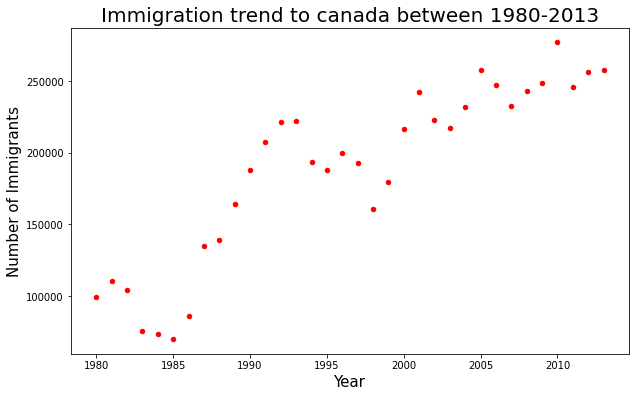

In [37]:
# now the data frame is ready for scatter plot
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='red')
plt.title('Immigration trend to canada between 1980-2013',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Immigrants',fontsize=15)
plt.show()

In [38]:
# Next, we will plot a linearfit
x=df_tot['year']
y=df_tot['total']
fit=np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

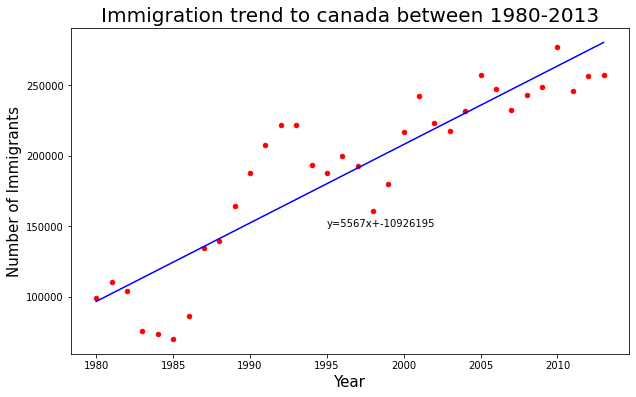

'No. Immigrants=5567*year+-10926195'

In [39]:
# plot the regression line on the scatter plot
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='red')
plt.title('Immigration trend to canada between 1980-2013',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Immigrants',fontsize=15)
#plot line of best fit
plt.plot(x,fit[0]*x+fit[1],color='blue')
plt.annotate('y={0:.0f}x+{1:.0f}'.format(fit[0],fit[1]),xy=(1995,150000))
plt.show()
#print out the line of best fit
'No. Immigrants={0:.0f}*year+{1:.0f}'.format(fit[0],fit[1])

In [40]:
df1=df_can.loc[:,year]
df1

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217


In [41]:
df_countries=pd.DataFrame(df1.loc[['Denmark','Norway','Sweden'],:].sum(axis=0))
df_countries#select three rows denmark, norway and sweden and add their population in each year.


,0
1980,669
1981,678
1982,627
1983,333
1984,252
1985,285
1986,336
1987,387
1988,373
1989,387


In [42]:
df_countries.index=map(int,df_countries.index)#convert strings into integer.
df_countries.reset_index(inplace=True) #reset index to 0,1,....
df_countries.columns=['year','Total']#rename columns as country
df_countries.dtypes#check if the country column is converted to integer

year     int64
Total    int64
dtype: object

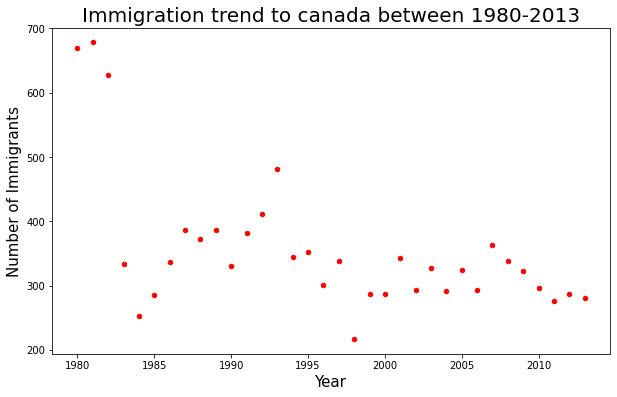

In [43]:
# now the data frame is ready for scatter plot
df_countries.plot(kind='scatter',x='year',y='Total',figsize=(10,6),color='red')
plt.title('Immigration trend to canada between 1980-2013',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Immigrants',fontsize=15)
plt.show()

In [44]:
# Next, we will plot a linearfit
x=df_countries['year']
y=df_countries['Total']
fit=np.polyfit(x,y,deg=1)
fit

array([-6.14698243e+00,  1.26281563e+04])

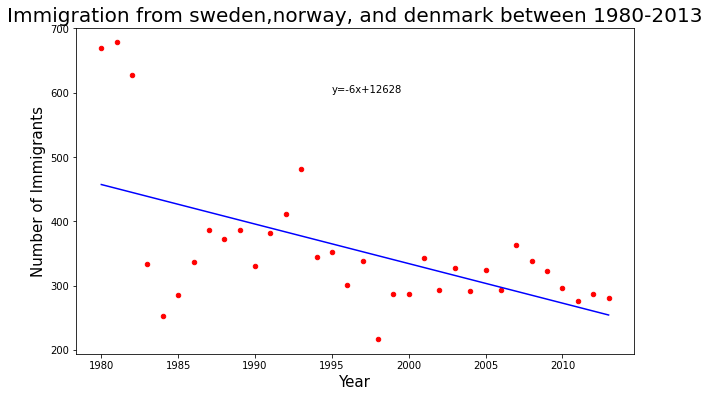

'No. Immigrants=-6*year+12628'

In [45]:
# plot the regression line on the scatter plot
df_countries.plot(kind='scatter',x='year',y='Total',figsize=(10,6),color='red')
plt.title('Immigration from sweden,norway, and denmark between 1980-2013',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Immigrants',fontsize=15)
#plot line of best fit
plt.plot(x,fit[0]*x+fit[1],color='blue')
plt.annotate('y={0:.0f}x+{1:.0f}'.format(fit[0],fit[1]),xy=(1995,600))
plt.show()
#print out the line of best fit
'No. Immigrants={0:.0f}*year+{1:.0f}'.format(fit[0],fit[1])

**Bubble plot**

 Bubble plot is an extension of scatter plot where we can plot three dimensions of data(x,y,z). The size of the bubbles is determined by the the third variable z, also known as weight.
 We will use bubble plot to compare the immigration from Brazil and Argentina for the years 1980-2013.  Argentina suffered great depression and we would like to compare the trends of immigration to canada as compared to its neighbor canada.



**Step1: Get the dataframe**

In [89]:
# Step1: Get the data frame
#transposed dataframe
df_can_t=df_can[year].T
df_can_t.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


In [90]:
#cast the years to type integer
df_can_t.index=map(int,df_can_t.index)

In [91]:
# Label the index.
df_can_t.index.name='Year'
df_can_t.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114
1982,39,0,71,0,0,6,0,626,0,484,...,9074,146,0,0,174,2162,0,1,11,102
1983,47,0,69,0,0,6,0,241,0,317,...,7100,105,0,0,124,3404,0,6,7,44
1984,71,0,63,0,0,4,42,237,0,317,...,6661,90,0,0,142,7583,0,0,16,32


In [92]:
# reset index to bring the year in as column
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


**Step2: Crate the normalized weights**
We will use feature scaling to bring all the values into the range[0,1]. The general formula is:
X'=X-Xmin/Xmax-Xmin

In [97]:
#normalize brazil data
norm_brazil=(df_can_t['Brazil']-df_can_t['Brazil'].min())/(df_can_t['Brazil'].max()-df_can_t['Brazil'].min())
# normalize Argentina data
norm_argentina=(df_can_t['Argentina']-df_can_t['Argentina'].min())/(df_can_t['Argentina'].max()-df_can_t['Argentina'].min())

**Step3: Plot the data**

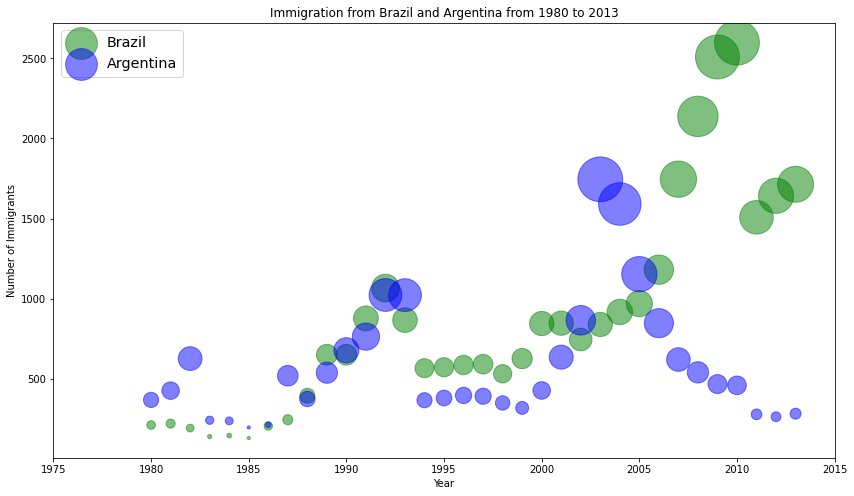

In [98]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )
# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# **Waffle Charts, Word Clouds, and Regression Plots**

In [100]:
# Import libraries
import seaborn as sns #import seaborn
from PIL import Image #converting images into arrays
import matplotlib as mpl
import matplotlib.patches as mpatches # needed for waffle charts
mpl.style.use('ggplot')#optional:for ggplot-like style

**Waffle Charts**
A waffle chart is an interesting visualization that is normally created to display progress towards goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells suchs as Excel dashbort

### **Regression Plots**

In [102]:
# create a new data frame that stores the total number of  immigrants to canada
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


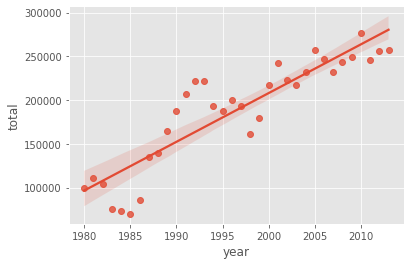

In [104]:
# with seaborn  generate regression plot
sns.regplot(x='year',y='total',data=df_tot)

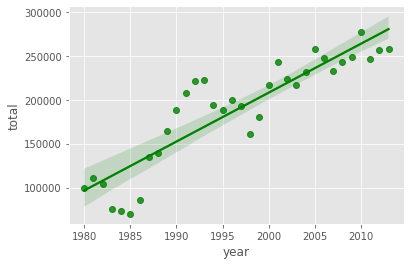

In [107]:
# lets customize color to green
sns.regplot(x='year',y='total',data=df_tot,color='green',marker='o')

Text(0.5, 1.0, 'Total Immigration to canada from 1980-2013')

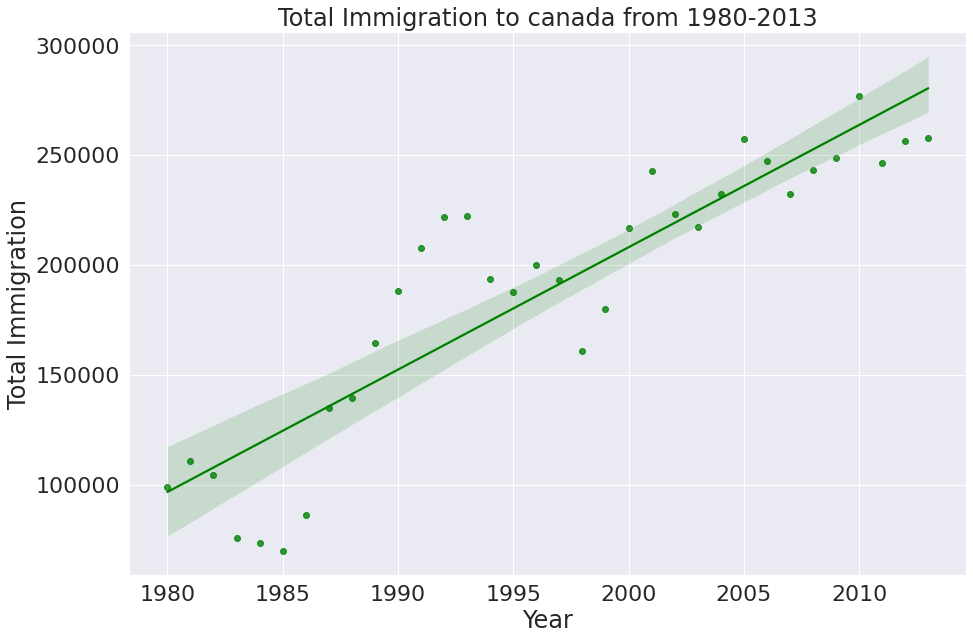

In [115]:
# lets blow up the plot a little so that it is more appealing to the sight.
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
ax=sns.regplot(x='year',y='total',data=df_tot,color='green',marker='o')
ax.set(xlabel='Year',ylabel='Total Immigration')# add x and y label
ax.set_title('Total Immigration to canada from 1980-2013')


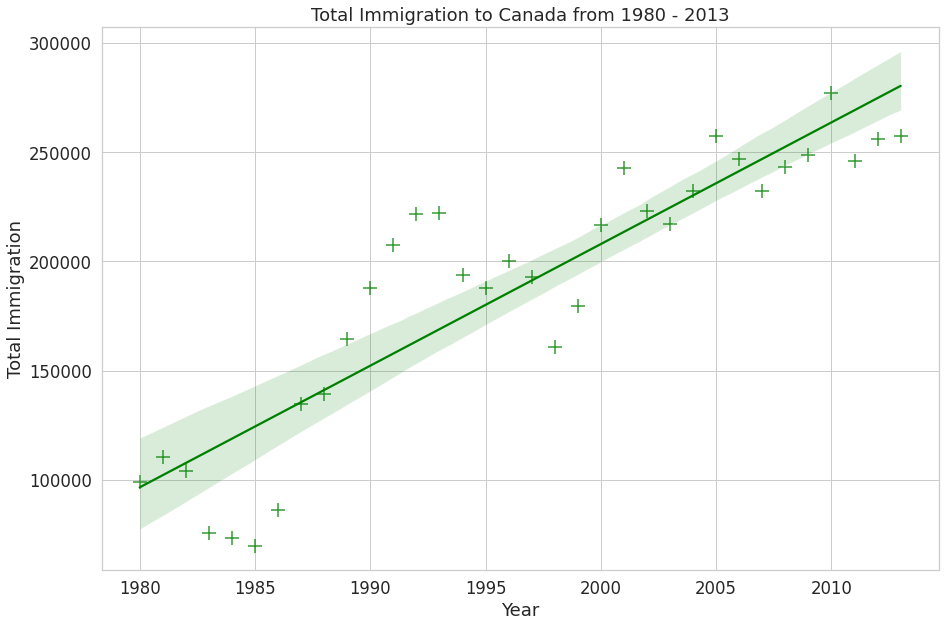

In [116]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

In [128]:
df_dsn=pd.DataFrame(df_can.loc[['Denmark','Sweden','Norway'],:].sum(axis=0))
df_dsn.drop(['Continent','Region','DevName','Total'],axis=0,inplace=True)
df_dsn

,0
1980,669
1981,678
1982,627
1983,333
1984,252
1985,285
1986,336
1987,387
1988,373
1989,387


In [131]:
df_dsn.index=map(int,df_dsn.index)
df_dsn.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

In [135]:
df_dsn.reset_index(inplace=True)

In [136]:
df_dsn.columns=['year','total']
df_dsn

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


In [143]:
df_dsn['total']=df_dsn['total'].astype(int)
df_dsn.dtypes

year     int64
total    int64
dtype: object

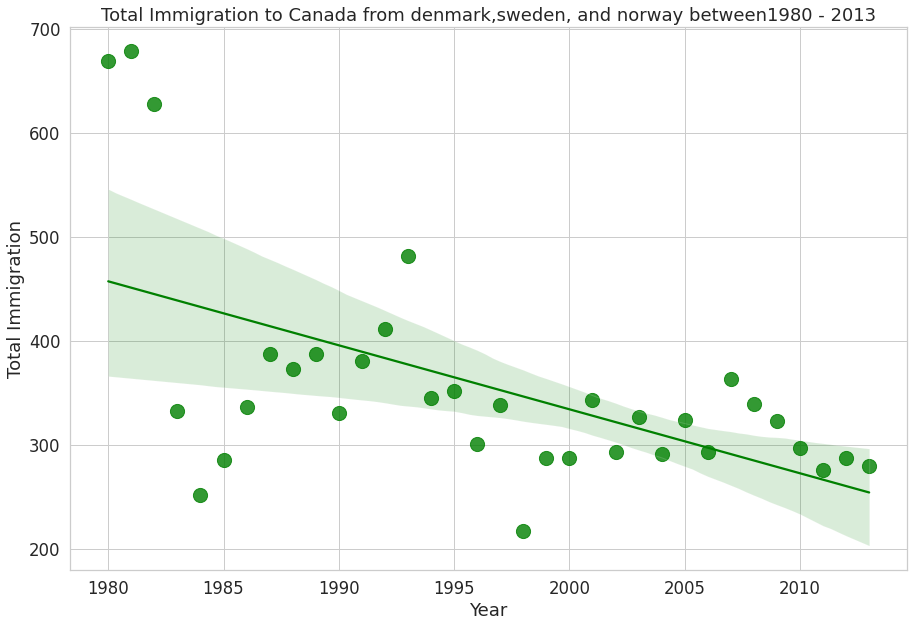

In [144]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_dsn, color='green', marker='o', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from denmark,sweden, and norway between1980 - 2013')
plt.show()